Yilei Dong | ID: 1466802171 | DSCI 352

Classifying different datasets with decision trees, Ridge Regularized, and LASSO Regularized Regressions. 

#### 1. Decision Trees as Interpretable Models
##### (a) Download the Accute Inflamations data from https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations. 

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import tree
from skmultilearn.problem_transform import LabelPowerset
from sklearn.tree import _tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.regression import linear_model
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import math 
import statsmodels.api as sm

# Read in dataset & name data columns 
df = pd.read_csv('diagnosis.data', header=None, sep='\t', decimal=',', encoding='utf-16')
df.columns = ['Temperature of patient', 'Occurrence of nausea', 'Lumbar pain', 
              'Urine pushing (continuous need for urination)', 'Micturition pains', 
              'Burning of urethra, itch, swelling of urethra outlet', 
              'd1 decision: Inflammation of urinary bladder', 'd2 decision: Nephritis of renal pelvis origin']

# Assign binary class labels 
df = df.replace('no', '0') # No = 0 
df = df.replace('yes', '1') # Yes = 1 

# Display part of dataframe
df.head()

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing (continuous need for urination),Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",d1 decision: Inflammation of urinary bladder,d2 decision: Nephritis of renal pelvis origin
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


##### (b) Build a decision tree on the whole data set and plot it. 

[Text(133.92000000000002, 195.696, 'X[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(66.96000000000001, 152.208, 'X[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(33.480000000000004, 108.72, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(100.44000000000001, 108.72, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(200.88000000000002, 152.208, 'X[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(167.40000000000003, 108.72, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(234.36, 108.72, 'X[4] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(200.88000000000002, 65.232, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(267.84000000000003, 65.232, 'X[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(234.36, 21.744, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(301.32000000000005, 2

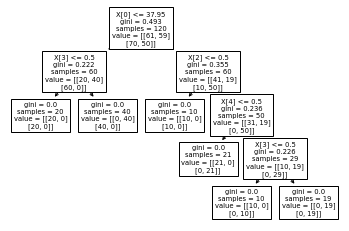

In [2]:
X = df.drop(['d1 decision: Inflammation of urinary bladder', 'd2 decision: Nephritis of renal pelvis origin'], axis=1)
Y = df[['d1 decision: Inflammation of urinary bladder', 'd2 decision: Nephritis of renal pelvis origin']]
clf = tree.DecisionTreeClassifier()
clf.fit(X, Y)
tree.plot_tree(clf)

##### (c) Convert the decision rules into a set of IF-THEN rules. 

In [3]:
# Source: https://mljar.com/blog/extract-rules-decision-tree/
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
    print("def predict({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)
    
tree_to_code(clf, ['Temperature of patient', 'Occurrence of nausea', 'Lumbar pain', 
              'Urine pushing (continuous need for urination)', 'Micturition pains', 
              'Burning of urethra, itch, swelling of urethra outlet'])

def predict(Temperature_of_pa, Occurrence_of_n, Lumbar, Urine_pushing_(continuous_need_for_urina, Micturition_, Burning_of_urethra,_itch,_swelling_of_urethra_o):
    if Temperature of patient <= 37.95:
        if Urine pushing (continuous need for urination) <= 0.5:
            return [[20.  0.]
 [20.  0.]]
        else:  # if Urine pushing (continuous need for urination) > 0.5
            return [[ 0. 40.]
 [40.  0.]]
    else:  # if Temperature of patient > 37.95
        if Lumbar pain <= 0.5:
            return [[10.  0.]
 [10.  0.]]
        else:  # if Lumbar pain > 0.5
            if Micturition pains <= 0.5:
                return [[21.  0.]
 [ 0. 21.]]
            else:  # if Micturition pains > 0.5
                if Urine pushing (continuous need for urination) <= 0.5:
                    return [[10.  0.]
 [ 0. 10.]]
                else:  # if Urine pushing (continuous need for urination) > 0.5
                    return [[ 0. 19.]
 [ 0. 19.]]


#### 2. Random Forests, Ridge Regularized, and LASSO Regularized Regression

##### (a) Download the Communities and Crime data from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set. 


In [4]:
df2 = pd.read_csv('communities.data', header=None, sep=',')
df2.columns = ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 
              'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 
              'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 
              'pctWRetire', 'medFamInc', 'perCapInc','whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 
              'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
              'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
              'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 
              'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 
              'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 
              'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 
              'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 
              'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 
              'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 
              'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 
              'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 
              'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 
              'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 
              'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
              'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 
              'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop']
df2 = df2.replace('?', np.nan)
df2.shape

(1994, 128)

In [5]:
df2.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [6]:
# Split into train & test sets 
x = df2.drop('ViolentCrimesPerPop', axis=1)
y = df2['ViolentCrimesPerPop']
x_train = x[:1495]
x_test = x[1495:]
y_train = y[:1495]
y_test = y[1495:]

##### (b) The data set has missing values. Use a simple data imputation technique (using the mean or median statistic of each feature) to deal with the missing values in the data set. The data description mentions that five features are nonpredictive. Ignore those features. 

In [7]:
# Drop nonpredicted features 
x_trainDropped = x_train.drop(['state', 'county', 'community', 'communityname', 'fold'], axis=1)

# Imput missing values with mean statistic of each feature 
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(x_trainDropped)
x_trainUpdate = imp_mean.transform(x_trainDropped)

# Create new x train
x_trainNew =  pd.DataFrame(x_trainUpdate)
x_trainNew.columns = ['population', 'householdsize', 'racepctblack', 
              'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 
              'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 
              'pctWRetire', 'medFamInc', 'perCapInc','whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 
              'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
              'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
              'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 
              'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 
              'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 
              'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 
              'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 
              'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 
              'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 
              'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 
              'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 
              'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 
              'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 
              'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
              'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 
              'LemasPctOfficDrugUn', 'PolicBudgPerPop']
x_trainNew.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.323598,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.323598,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.323598,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.323598,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753


In [8]:
x_testDropped = x_test.drop(['state', 'county', 'community', 'communityname', 'fold'], axis=1)
imp_mean1 = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean1.fit(x_testDropped)
x_testUpdate = imp_mean1.transform(x_testDropped)
x_testNew =  pd.DataFrame(x_testUpdate)
x_testNew.columns = ['population', 'householdsize', 'racepctblack', 
              'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 
              'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 
              'pctWRetire', 'medFamInc', 'perCapInc','whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 
              'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
              'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
              'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 
              'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 
              'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 
              'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 
              'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 
              'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 
              'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 
              'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 
              'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 
              'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 
              'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 
              'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
              'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 
              'LemasPctOfficDrugUn', 'PolicBudgPerPop']
x_testNew.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.253375,0.01,0.23,0.73,0.1605,0.065375,0.655375,0.40625,0.0,0.208
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.253375,0.01,0.18,0.02,0.1605,0.065375,0.655375,0.40625,0.0,0.208
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.253375,0.01,0.18,0.00,0.1605,0.065375,0.655375,0.40625,0.0,0.208
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.253375,0.06,0.13,0.16,0.1605,0.065375,0.655375,0.40625,0.0,0.208
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.253375,0.03,0.23,0.06,0.1605,0.065375,0.655375,0.40625,0.0,0.208


##### (c) Plot a correlation matrix for the features in the data set. 

In [9]:
x_trainNew.corr()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
population,1.000000,-0.040404,0.242144,-0.306023,0.168868,0.162282,0.014554,0.128721,0.075744,-0.107060,...,0.125115,0.747424,0.235510,0.283682,0.630778,0.591778,-0.063029,0.041216,0.464459,-0.011305
householdsize,-0.040404,1.000000,-0.068374,-0.243565,0.209848,0.473320,0.517742,0.371658,0.301949,-0.606714,...,0.031750,-0.020832,-0.003807,-0.030652,-0.014900,0.004813,-0.024445,0.008771,-0.086315,-0.021276
racepctblack,0.242144,-0.068374,1.000000,-0.793431,-0.104912,-0.069449,0.118272,0.143406,0.125330,0.056381,...,-0.069725,0.155017,0.101270,0.169002,0.142543,0.104193,-0.113466,0.022226,0.257781,0.042346
racePctWhite,-0.306023,-0.243565,-0.793431,1.000000,-0.270829,-0.436737,-0.189135,-0.258390,-0.175195,0.138619,...,-0.017046,-0.147054,-0.339787,-0.234460,-0.131432,-0.126551,0.077626,-0.048890,-0.272366,-0.029339
racePctAsian,0.168868,0.209848,-0.104912,-0.270829,1.000000,0.264600,-0.017945,0.106958,0.056442,-0.283709,...,0.153146,0.004790,0.360708,0.274826,-0.023657,0.044584,0.031598,0.050863,0.100653,-0.004045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PolicOperBudg,0.591778,0.004813,0.104193,-0.126551,0.044584,0.071164,-0.009618,0.017201,0.002304,-0.031643,...,0.104500,0.429176,0.138857,0.180796,0.836614,1.000000,-0.070216,-0.013583,-0.068059,0.297196
LemasPctPolicOnPatr,-0.063029,-0.024445,-0.113466,0.077626,0.031598,0.018398,-0.025210,-0.008902,-0.006311,0.021422,...,0.017528,-0.067853,0.068739,0.028476,-0.118489,-0.070216,1.000000,-0.033617,0.032430,-0.187790
LemasGangUnitDeploy,0.041216,0.008771,0.022226,-0.048890,0.050863,0.048441,0.035629,0.016274,0.015603,-0.034216,...,0.123336,0.070956,-0.071059,-0.084771,0.008831,-0.013583,-0.033617,1.000000,-0.017356,-0.040769
LemasPctOfficDrugUn,0.464459,-0.086315,0.257781,-0.272366,0.100653,0.126210,0.012529,0.117998,0.083582,-0.022575,...,-0.013820,0.322885,0.236545,0.209710,-0.058210,-0.068059,0.032430,-0.017356,1.000000,0.017402


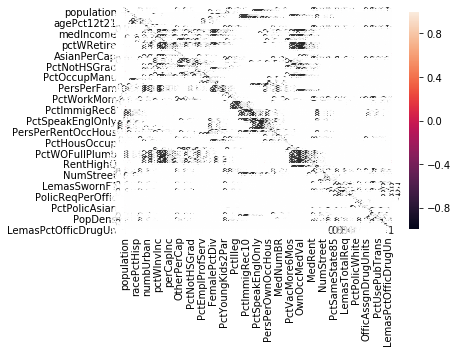

In [10]:
corre = x_trainNew.corr()
sns.heatmap(corre, annot=True)
plt.show()

##### (d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m, in which s is sample standard deviation and m is sample mean. 


In [11]:
# Source: https://www.statology.org/coefficient-of-variation-in-python/

#define function to calculate cv
cv = lambda k: np.std(k, ddof=1) / np.mean(k) * 100 

#calculate CV for each column in data frame
CVfeatures = x_trainNew.apply(cv)

x_trainNewColumns = x_trainNew.columns = ['population', 'householdsize', 'racepctblack', 
              'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 
              'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 
              'pctWRetire', 'medFamInc', 'perCapInc','whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 
              'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
              'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
              'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 
              'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 
              'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 
              'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 
              'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 
              'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 
              'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 
              'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 
              'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 
              'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 
              'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 
              'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
              'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 
              'LemasPctOfficDrugUn', 'PolicBudgPerPop']
CVfeatureslist = CVfeatures.to_list()
CVdf = {'Features':x_trainNewColumns,'CV':CVfeatureslist}
CVdfshow = pd.DataFrame(CVdf)
CVdfshow

,Features,CV
0,population,224.110462
1,householdsize,35.579957
2,racepctblack,142.888542
3,racePctWhite,33.021266
4,racePctAsian,135.909968
...,...,...
117,PolicOperBudg,74.348659
118,LemasPctPolicOnPatr,11.573888
119,LemasGangUnitDeploy,36.298927
120,LemasPctOfficDrugUn,255.294551


##### (e) Pick floor √122 features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots? 

In [12]:
# Display features with highest CV 
highestCVpick = math.sqrt(122)
highestCV = math.floor(highestCVpick)
descendCV = CVdfshow.sort_values(by=['CV'], ascending=False)
descendCV[:highestCV]

,Features,CV
90,NumStreet,429.292299
89,NumInShelters,347.095214
49,NumIlleg,305.896435
51,NumImmig,292.663525
120,LemasPctOfficDrugUn,255.294551
27,NumUnderPov,234.244312
0,population,224.110462
10,numbUrban,203.846149
71,HousVacant,196.846705
113,LandArea,164.540786


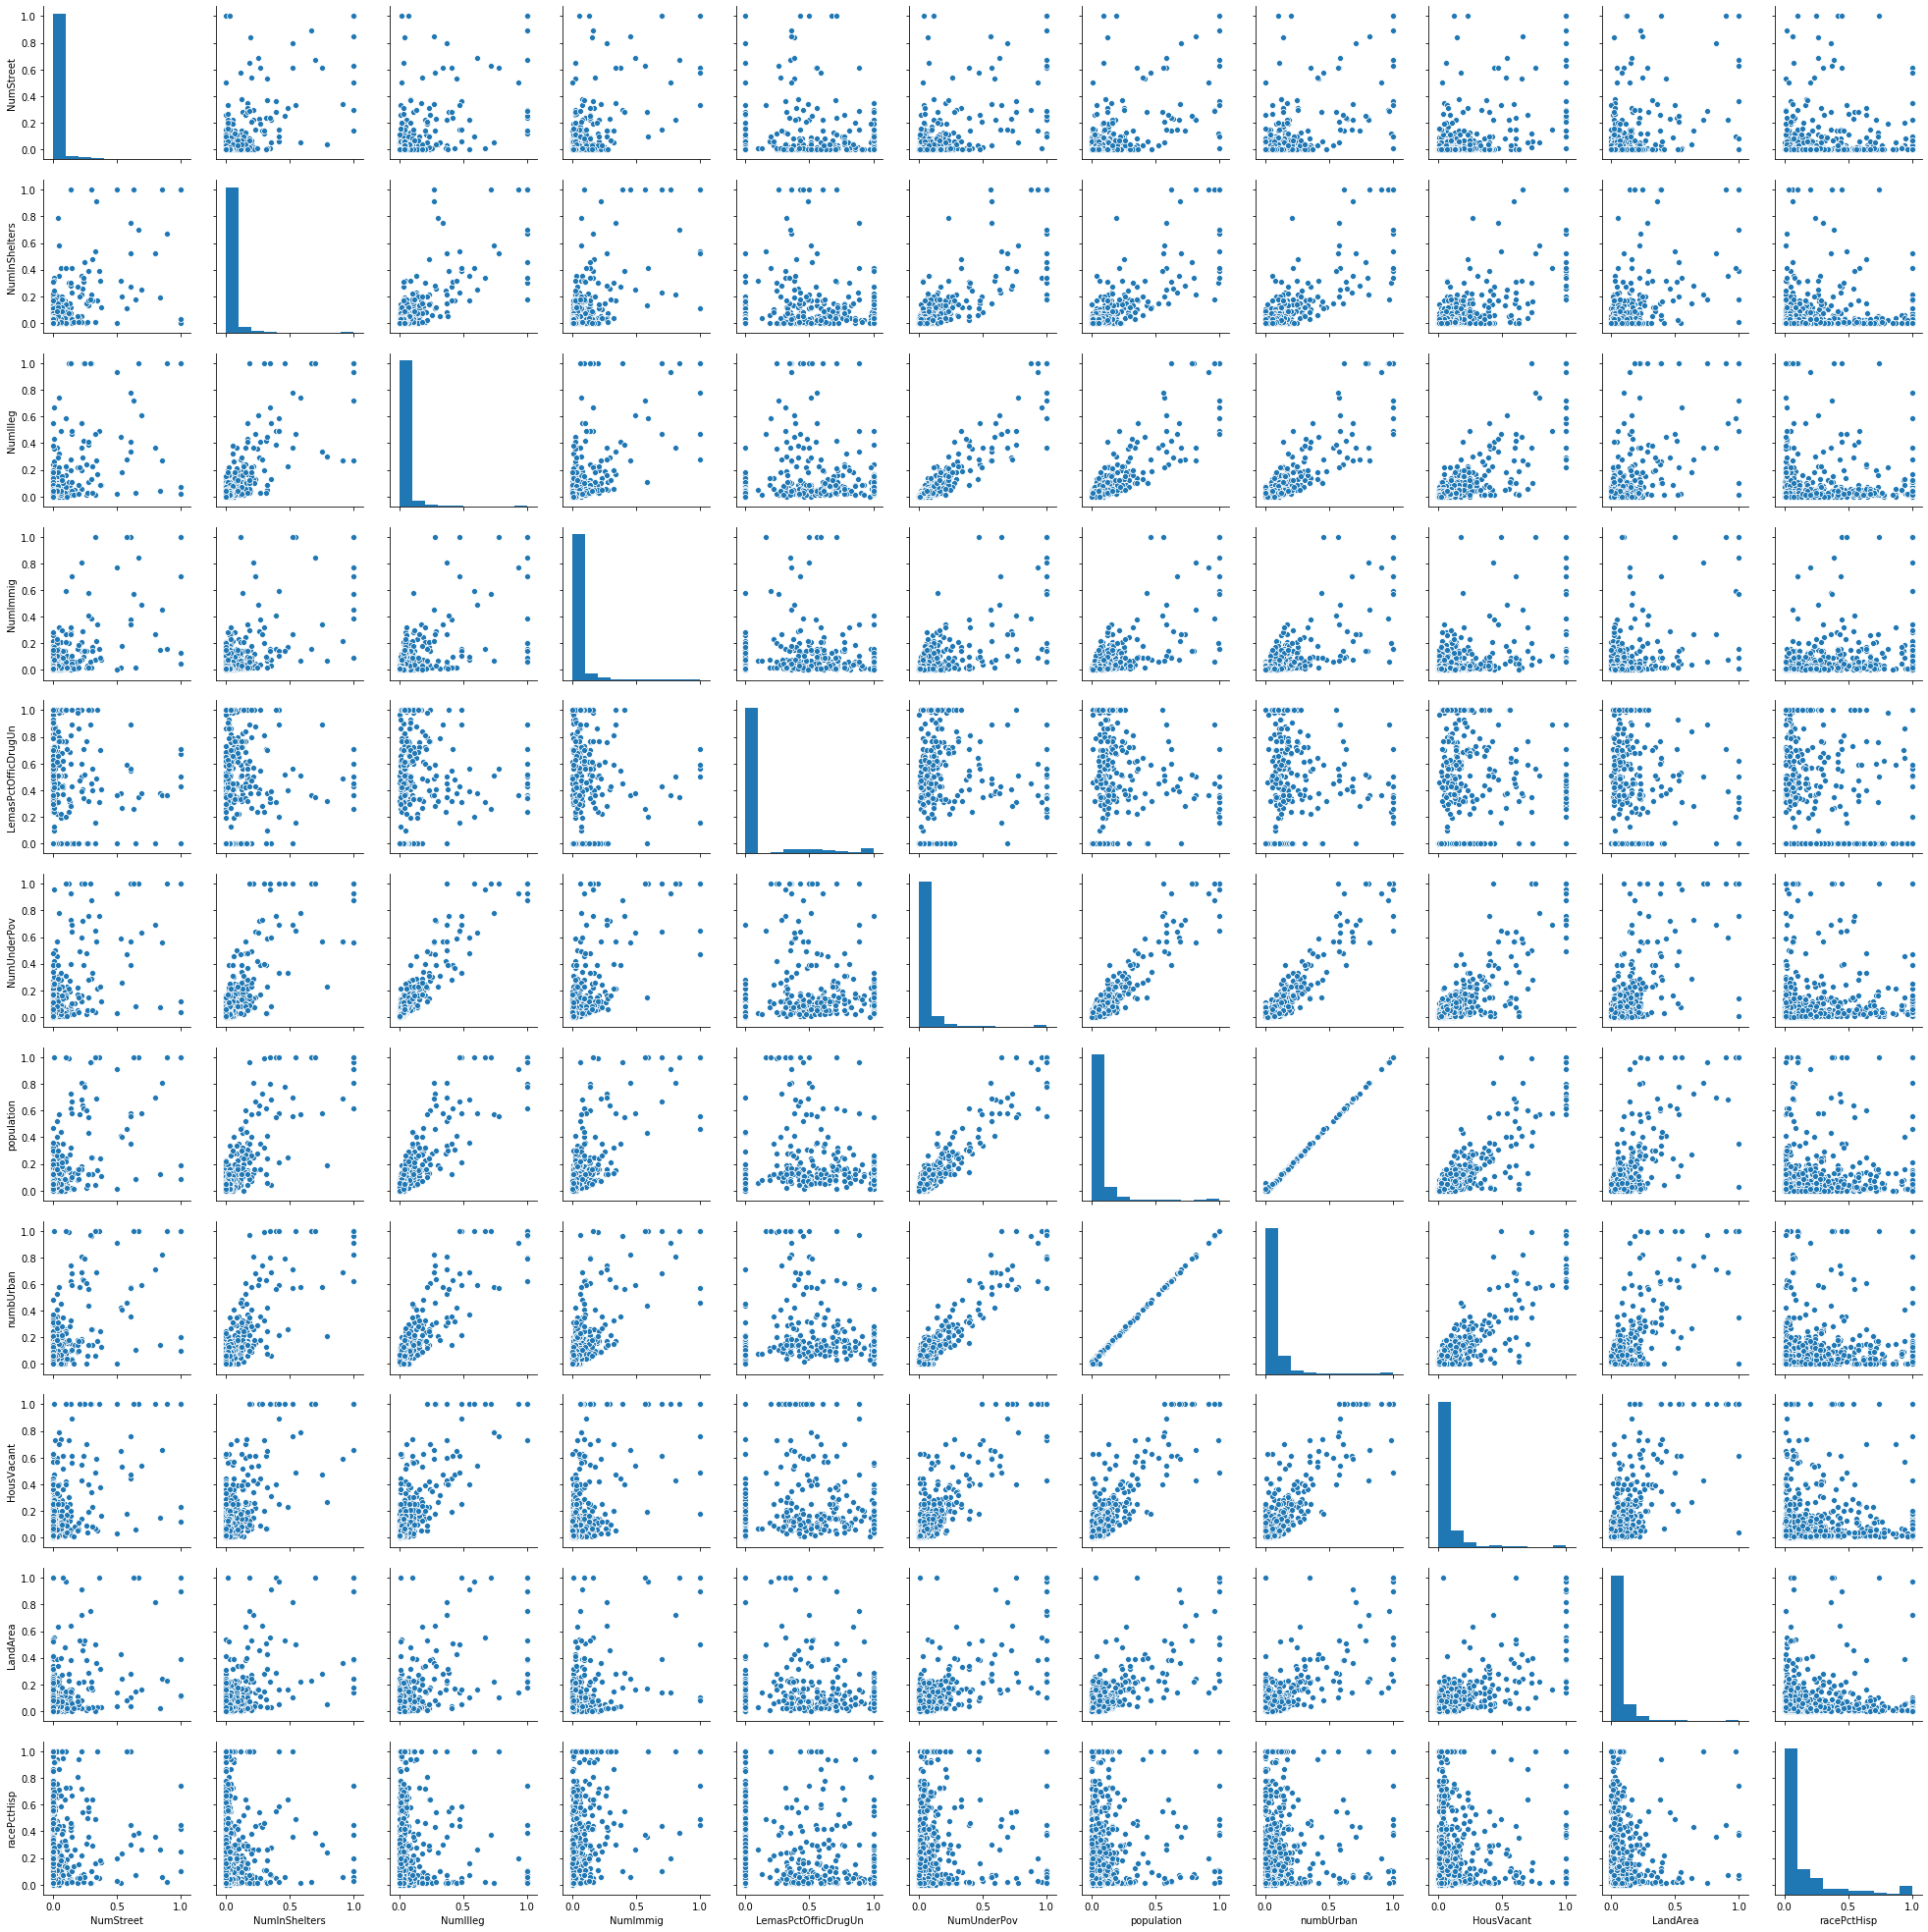

In [13]:
# Make scatterplots 
sns.pairplot(x_trainNew[['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 
           'population', 'numbUrban', 'HousVacant', 'LandArea', 'racePctHisp']])

Based on the scatter plots, the strongest positive correlation seems to be between population & numbUrban. Other fairly strong positive correlations that exist seem to be NumUnderPov & population, numbUrban & NumUnderPov. There are plenty of other positive correlations visible, but these are just a few. 

[Text(0, 0, 'NumStreet'),
 Text(0, 0, 'NumInShelters'),
 Text(0, 0, 'NumIlleg'),
 Text(0, 0, 'NumImmig'),
 Text(0, 0, 'LemasPctOfficDrugUn'),
 Text(0, 0, 'NumUnderPov'),
 Text(0, 0, 'population'),
 Text(0, 0, 'numbUrban'),
 Text(0, 0, 'HousVacant'),
 Text(0, 0, 'LandArea'),
 Text(0, 0, 'racePctHisp')]

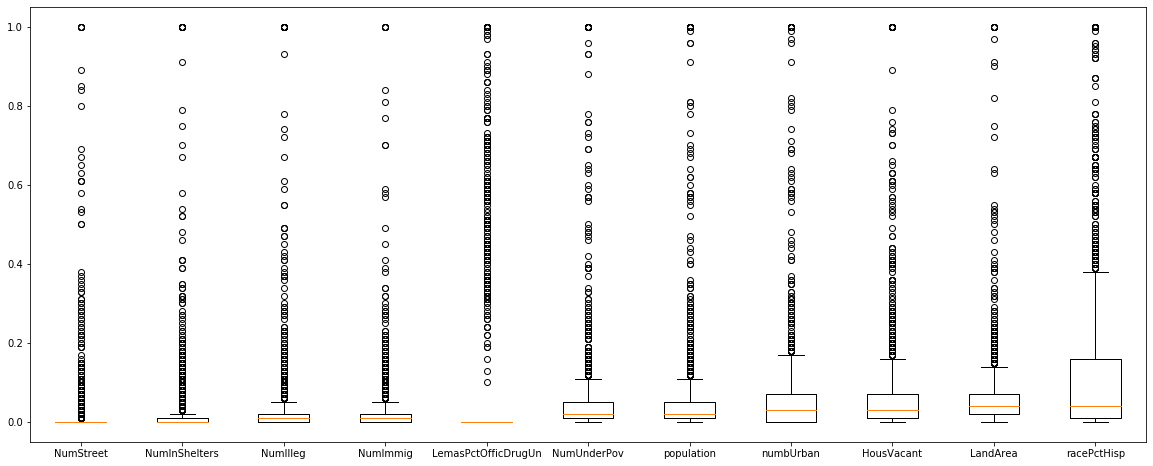

In [14]:
# Display box plots 
x_box = x_trainNew[['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 
           'population', 'numbUrban', 'HousVacant', 'LandArea', 'racePctHisp']]
my_dict = {'NumStreet': x_box['NumStreet'], 'NumInShelters': x_box['NumInShelters'], 'NumIlleg': x_box['NumIlleg'],
           'NumImmig': x_box['NumImmig'], 'LemasPctOfficDrugUn': x_box['LemasPctOfficDrugUn'], 
           'NumUnderPov': x_box['NumUnderPov'], 'population': x_box['population'], 'numbUrban': x_box['numbUrban'], 
           'HousVacant': x_box['HousVacant'], 'LandArea': x_box['LandArea'], 'racePctHisp': x_box['racePctHisp']}
fig, ax = plt.subplots(figsize=(20, 8))
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

##### f) Fit a linear model using least squares to the training set and report the test error. 

In [15]:
reg = LinearRegression().fit(x_trainNew, y_train)
y_predict = reg.predict(x_testNew)
print("linear model error:", mean_squared_error(y_test, y_predict))

linear model error: 0.018112462026533483


##### (g) Fit a ridge regression model on the training set, with λ chosen by 5-fold cross-validation. Report the test error obtained. 

In [16]:
ridgeCV = RidgeCV(cv=5).fit(x_trainNew, y_train)
y_predict1 = ridgeCV.predict(x_testNew)
print("ridge regression model error:", mean_squared_error(y_test, y_predict1)) 

ridge regression model error: 0.017723737122827796


##### (h) Fit a LASSO model on the training set, with λ chosen by 5-fold cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them. 

In [17]:
lassoCV = LassoCV(cv=5).fit(x_trainNew, y_train)
y_predict2 = lassoCV.predict(x_testNew)
print("LASSO error no standard:", mean_squared_error(y_test, y_predict2))

LASSO error no standard: 0.017735383043771757


C:\Users\yilei\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00975293022821333, tolerance: 0.006746416078595318
  tol, rng, random, positive)
C:\Users\yilei\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01011361015590495, tolerance: 0.006746416078595318
  tol, rng, random, positive)


In [18]:
lassoCVdf = {'Features':x_testNew.columns,'CV':lassoCV.coef_}
lassoCVshow = pd.DataFrame(lassoCVdf)
lassoCVshow[lassoCVshow.CV > 0.00]

,Features,CV
2,racepctblack,0.271984
6,agePct12t21,0.066658
11,pctUrban,0.040512
14,pctWFarmSelf,0.026607
16,pctWSocSec,0.048560
17,pctWPubAsst,0.038868
24,AsianPerCap,0.029002
25,OtherPerCap,0.022693
26,HispPerCap,0.023950
33,PctEmploy,0.137394


In [19]:
scaler = StandardScaler()
x_trainScale = scaler.fit_transform(x_trainNew)
x_testScale = scaler.fit_transform(x_testNew)
lassoCVstandard = LassoCV(cv=5).fit(x_trainScale, y_train)
y_predict3 = lassoCVstandard.predict(x_testScale)
print("LASSO error standardized", mean_squared_error(y_test, y_predict3))

C:\Users\yilei\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009826702368904705, tolerance: 0.006746416078595318
  tol, rng, random, positive)
C:\Users\yilei\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010211306993532787, tolerance: 0.006746416078595318
  tol, rng, random, positive)
C:\Users\yilei\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00998116673633831, tolerance: 0.006746416078595318
  tol, rng, random, positive)
C:\Users\yilei\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not c

LASSO error standardized 0.017999482117792023


In [20]:
lassoCVdfstand = {'Features':x_testNew.columns,'CV':lassoCVstandard.coef_}
lassoCVshowstand = pd.DataFrame(lassoCVdfstand)
lassoCVshowstand[lassoCVshowstand.CV > 0.00]

,Features,CV
2,racepctblack,0.068248
6,agePct12t21,0.010367
11,pctUrban,0.016588
14,pctWFarmSelf,0.004100
16,pctWSocSec,0.008884
17,pctWPubAsst,0.006135
24,AsianPerCap,0.005306
25,OtherPerCap,0.003816
26,HispPerCap,0.003992
33,PctEmploy,0.021190


The test errors obtained for both the regular features & standardized features are very similar with one another, although, the standardized feature error is slightly higher. 

##### (i) Fit random forest models to the training set using m = floor √123 and m = 122 and plot the train, out of bag (OOB), and test errors for B ∈ {1, 2, . . . , 300} on the same plot and compare them. 

In [21]:
from sklearn.ensemble import RandomForestRegressor
modelvar = math.sqrt(123)
m = math.floor(modelvar) # number splits

trainErrors = []
OOBErrors = []
testErrors = []
b_values = []

for i in range(1, 300): 
    
    # max_features -> m = floor sqrt(23)
    # training errors 
    forest = RandomForestRegressor(max_features=m, oob_score=True, max_samples=i)
    forestTrain = forest.fit(x_trainNew, y_train)
    forestPredictYtrain = forestTrain.predict(x_trainNew)
    trainError = mean_squared_error(y_train, forestPredictYtrain)
    trainErrors.append(trainError)
    
    # test errors 
    forestPredictYtest = forestTrain.predict(x_testNew)
    testError = mean_squared_error(y_test, forestPredictYtest)
    testErrors.append(testError)

    # out of bag errors 
    OOBError = 1-forest.oob_score_
    OOBErrors.append(OOBError)

    b_values.append(i) 

In [22]:
mNew = 122 # number splits

trainErrorsOther = []
OOBErrorsOther = []
testErrorsOther = []
b_valuesOther = []

for j in range(1, 300): 
    
    # max_features -> m = 122
    # training errors 
    forestOther = RandomForestRegressor(max_features=mNew, oob_score=True, max_samples=j)
    forestTrainOther = forestOther.fit(x_trainNew, y_train)
    forestPredictOtherYtrain = forestTrainOther.predict(x_trainNew)
    trainErrorOther = mean_squared_error(y_train, forestPredictOtherYtrain)
    trainErrorsOther.append(trainErrorOther)
    
    # test errors 
    forestPredictOtherYtest = forestTrainOther.predict(x_testNew)
    testErrorOther = mean_squared_error(y_test, forestPredictOtherYtest)
    testErrorsOther.append(testErrorOther)

    # out of bag errors 
    OOBErrorOther = 1-forestOther.oob_score_
    OOBErrorsOther.append(OOBErrorOther)

    b_valuesOther.append(j) 

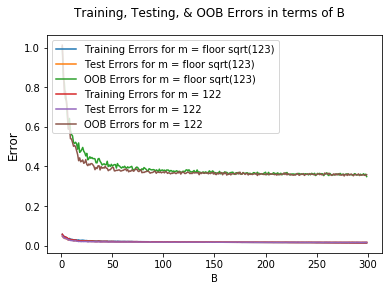

In [23]:
fig, ax = plt.subplots()
line1 = ax.plot(b_values, trainErrors, label='Training Errors for m = floor sqrt(123)')
line2 = ax.plot(b_values, testErrors, label='Test Errors for m = floor sqrt(123)')
line3 = ax.plot(b_values, OOBErrors, label='OOB Errors for m = floor sqrt(123)')
line4 = ax.plot(b_valuesOther, trainErrorsOther, label='Training Errors for m = 122')
line5 = ax.plot(b_valuesOther, testErrorsOther, label='Test Errors for m = 122')
line6 = ax.plot(b_valuesOther, OOBErrorsOther, label='OOB Errors for m = 122')
plt.legend(loc='upper left')
fig.suptitle('Training, Testing, & OOB Errors in terms of B', fontsize=12)
ax.set_xlabel('B', fontsize=12)
ax.set_ylabel('Error', fontsize=12)
ax.xaxis.label.set_size(10)
plt.draw()

The errors for both m = floor sqrt(123) and m = 122 are similiar for each value of B. 

##### (j) Build a variable importance plot from your random forest. If the variable importance plot is hard to read, only keep the top 10 most important features. 

<BarContainer object of 10 artists>

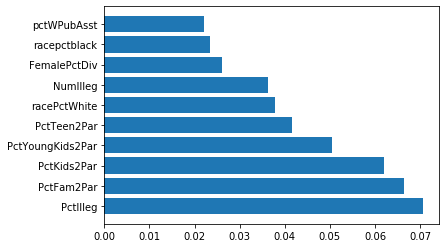

In [24]:
# for m = floor sqrt(123)
forest = RandomForestRegressor(max_features=m, oob_score=True, max_samples=300)
forestTest = forest.fit(x_testNew, y_test)
featureImportdf = {'Features':x_testNew.columns,'Feature Importances':forestTest.feature_importances_}
featureImportshow = pd.DataFrame(featureImportdf)
highestFeatpick = 10
featureImportshowDescend = featureImportshow.sort_values(by=['Feature Importances'], ascending=False)
graph = featureImportshowDescend[:highestFeatpick]
plt.barh(graph['Features'], graph['Feature Importances'])

<BarContainer object of 10 artists>

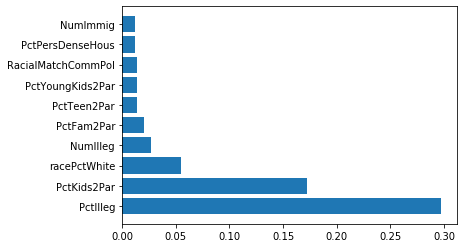

In [25]:
# for m = floor sqrt(122)
forestOther = RandomForestRegressor(max_features=mNew, oob_score=True, max_samples=300)
forestTestOther = forestOther.fit(x_testNew, y_test)
featureImportdf2 = {'Features':x_testNew.columns,'Feature Importances':forestTestOther.feature_importances_}
featureImportshow2 = pd.DataFrame(featureImportdf2)
featureImportshowDescend2 = featureImportshow2.sort_values(by=['Feature Importances'], ascending=False)
graph2 = featureImportshowDescend2[:highestFeatpick]
plt.barh(graph2['Features'], graph2['Feature Importances'])

##### (k) Use an iterative data imputation technique and repeat the above.

C:\Users\yilei\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


<BarContainer object of 10 artists>

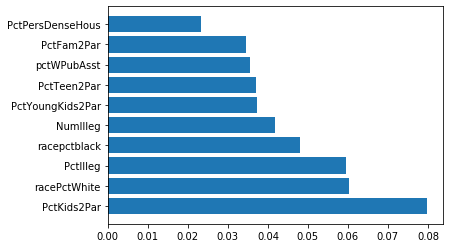

In [26]:
imputee = IterativeImputer()
x_testIterdf = imputee.fit_transform(x_testDropped)
x_testIter =  pd.DataFrame(x_testIterdf)
x_testIter.columns = ['population', 'householdsize', 'racepctblack', 
              'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 
              'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 
              'pctWRetire', 'medFamInc', 'perCapInc','whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 
              'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
              'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
              'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 
              'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 
              'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 
              'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 
              'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 
              'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 
              'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 
              'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 
              'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 
              'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 
              'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 
              'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
              'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 
              'LemasPctOfficDrugUn', 'PolicBudgPerPop']
x_testIter.head()

forestTestIter = forest.fit(x_testIter, y_test)
featureImportdfIter = {'Features':x_testIter.columns,'Feature Importances':forestTrain.feature_importances_}
featureImportshowIter = pd.DataFrame(featureImportdfIter)
featureImportshowDescendIter = featureImportshowIter.sort_values(by=['Feature Importances'], ascending=False)
graphs = featureImportshowDescendIter[:highestFeatpick]
plt.barh(graphs['Features'], graphs['Feature Importances'])

<BarContainer object of 10 artists>

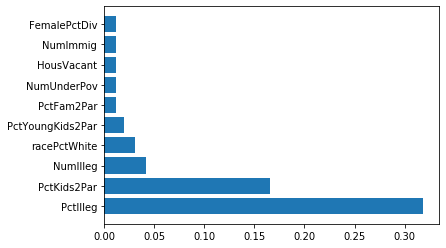

In [27]:
forestTestIterOther = forestOther.fit(x_testIter, y_test)
featureImportdfIterOther = {'Features':x_testIter.columns,'Feature Importances':forestTestOther.feature_importances_}
featureImportshowIterOther = pd.DataFrame(featureImportdfIterOther)
featureImportshowDescendIterOther = featureImportshowIterOther.sort_values(by=['Feature Importances'], ascending=False)
graphss = featureImportshowDescendIterOther[:highestFeatpick]
plt.barh(graphss['Features'], graphss['Feature Importances'])

##### (l) Repeat 2i and 2j using Extra Trees. Use bootstrap sub-samples whose size is 20% of the dataset.

In [28]:
print("Errors for EXTRA Trees, m = floor sqrt(123)")

# training errors 
Xtra = ExtraTreesRegressor(max_features=m, bootstrap=True, oob_score=True, max_samples=0.2)
XtraTrain = Xtra.fit(x_trainNew, y_train)
XtraPredictYtrain = XtraTrain.predict(x_trainNew)
trainErrorXtra = mean_squared_error(y_train, XtraPredictYtrain)
print("Training Errors:", trainErrorXtra)
    
# test errors 
XtraPredictYtest = XtraTrain.predict(x_testNew)
testErrorXtra = mean_squared_error(y_test, XtraPredictYtest)
print("Test Errors:", testErrorXtra)

# out of bag errors 
OOBErrorXtra = 1-Xtra.oob_score_
print("OOB Errors:", OOBErrorXtra)

Errors for EXTRA Trees, m = floor sqrt(123)
Training Errors: 0.014012890568561873
Test Errors: 0.017700491943887776
OOB Errors: 0.36758325546401305


<BarContainer object of 10 artists>

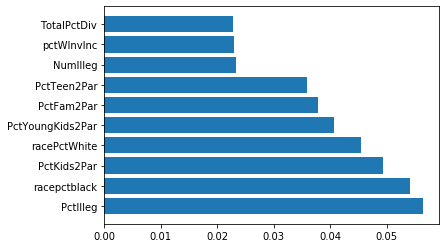

In [29]:
featureImportdfXtra = {'Features':x_testNew.columns,'Feature Importances':XtraTrain.feature_importances_}
featureImportshowXtra = pd.DataFrame(featureImportdfXtra)
featureImportshowDescendXtra = featureImportshowXtra.sort_values(by=['Feature Importances'], ascending=False)
graphsss = featureImportshowDescendXtra[:highestFeatpick]
plt.barh(graphsss['Features'], graphsss['Feature Importances'])

In [30]:
print("Errors for EXTRA Trees, m = 122")

# training errors 
XtraOther = ExtraTreesRegressor(max_features=mNew, bootstrap=True, oob_score=True, max_samples=0.2)
XtraTrainOther = XtraOther.fit(x_trainNew, y_train)
XtraPredictYtrainOther = XtraTrainOther.predict(x_trainNew)
trainErrorXtraOther = mean_squared_error(y_train, XtraPredictYtrainOther)
print("Training Errors:", trainErrorXtraOther)
    
# test errors 
XtraPredictYtestOther = XtraTrainOther.predict(x_testNew)
testErrorXtraOther = mean_squared_error(y_test, XtraPredictYtestOther)
print("Training Errors:", testErrorXtraOther)

# out of bag errors 
OOBErrorXtraOther = 1-XtraOther.oob_score_
print("OOB Errors:", OOBErrorXtraOther)

Errors for EXTRA Trees, m = 122
Training Errors: 0.013278532314381268
Training Errors: 0.016470841322645292
OOB Errors: 0.35294339564151733


<BarContainer object of 10 artists>

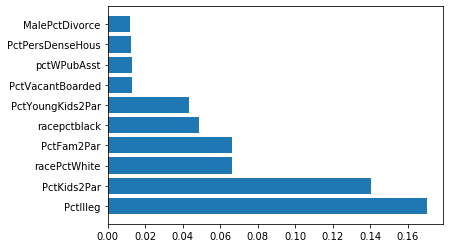

In [31]:
featureImportdfXtraOther = {'Features':x_testNew.columns,'Feature Importances':XtraTrainOther.feature_importances_}
featureImportshowXtraOther = pd.DataFrame(featureImportdfXtraOther)
featureImportshowDescendXtraOther = featureImportshowXtraOther.sort_values(by=['Feature Importances'], ascending=False)
graphssss = featureImportshowDescendXtraOther[:highestFeatpick]
plt.barh(graphssss['Features'], graphssss['Feature Importances'])